# Example: P3HT Structure Factor Calculation

In [1]:
# Magic for matplotlib widgets
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import os
import numpy as np, numpy.typing as npt
import pandas as pd
import kkcalc
import pyNexafs

In [2]:
plt.ion()
plt.interactive(True)

In [3]:
plt.isinteractive()

True

### Import the atomic scattering factors from the files

In [4]:
# Create a dictionary for different elements
elements: dict[int, tuple[npt.ArrayLike, npt.ArrayLike, npt.ArrayLike]] = {}
"""A dictionary of elemental atomic numbers and a tuple of energies and corresponding atomic scattering factors over mentioned energies."""

'A dictionary of elemental atomic numbers and a tuple of energies and corresponding atomic scattering factors over mentioned energies.'

In [5]:
# Import data
cwd = os.getcwd()
energies = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\Energy.txt"))
C_f1 = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\C_f1.txt"))
C_f2 = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\C_f2.txt"))
H_f1 = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\H_f1.txt"))
H_f2 = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\H_f2.txt"))
S_f1 = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\S_f1.txt"))
S_f2 = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\S_f2.txt"))

# Organise data
elements[1] = (energies, H_f1, H_f2)
elements[6] = (energies, C_f1, C_f2)
elements[16] = (energies, S_f1, S_f2)

In [6]:
# Display the data as a pandas frame
df = pd.DataFrame(
    {
        "Energy (eV)": energies,
        "C_f1": C_f1,
        "C_f2": C_f2,
        "H_f1": H_f1,
        "H_f2": H_f2,
        "S_f1": S_f1,
        "S_f2": S_f2,
    }
)
# Display the data frame
display(df)

,Energy (eV),C_f1,C_f2,H_f1,H_f2,S_f1,S_f2
0,2450.00,6.12897,0.11599,1.00010,0.000020,10.96270,0.40664
1,2450.25,6.12895,0.11596,1.00010,0.000020,10.94717,0.40737
2,2450.50,6.12893,0.11594,1.00010,0.000020,10.93163,0.40811
3,2450.75,6.12891,0.11591,1.00010,0.000020,10.91609,0.40885
4,2451.00,6.12890,0.11589,1.00010,0.000020,10.90056,0.40958
...,...,...,...,...,...,...,...
196,2499.00,6.12550,0.11153,1.00009,0.000019,11.99416,4.12663
197,2499.25,6.12548,0.11150,1.00009,0.000019,12.00027,4.10614
198,2499.50,6.12546,0.11148,1.00009,0.000019,12.00638,4.08565
199,2499.75,6.12545,0.11146,1.00009,0.000019,12.01249,4.06515


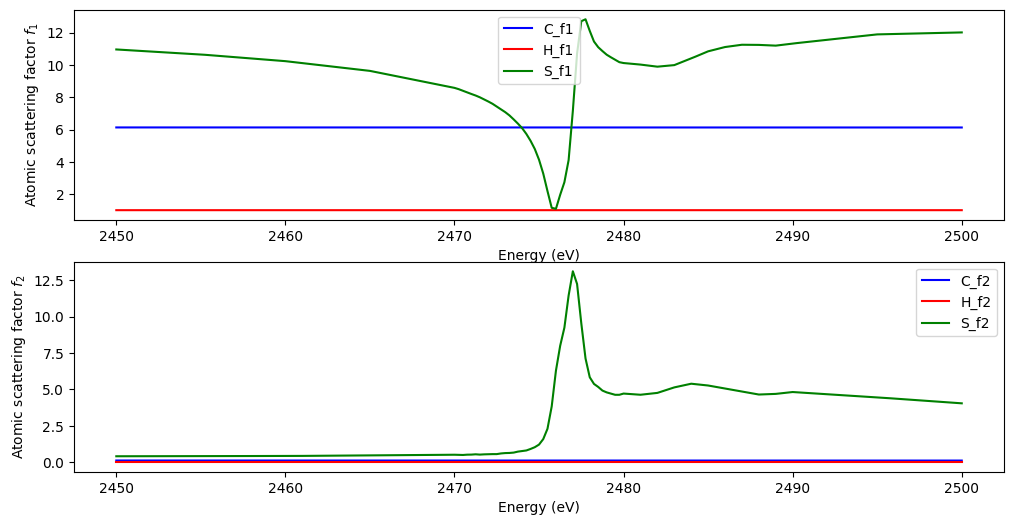

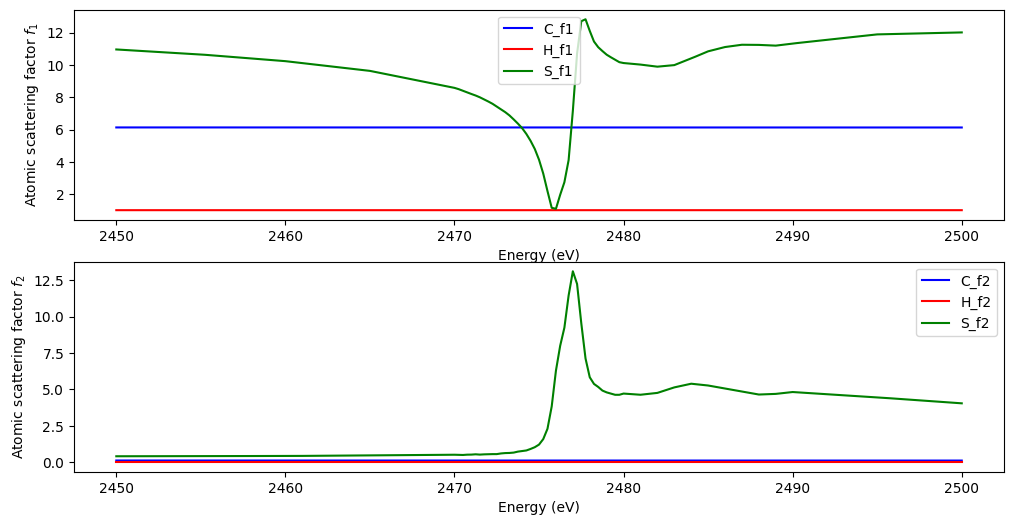

In [7]:
# Plot the data factors
f1_ax: plt.Axes
f2_ax: plt.Axes
fig, (f1_ax, f2_ax) = plt.subplots(2, 1, figsize=(12, 6))
f1_ax.plot(energies, C_f1, label="C_f1", color="blue")
f1_ax.plot(energies, H_f1, label="H_f1", color="red")
f1_ax.plot(energies, S_f1, label="S_f1", color="green")
f2_ax.plot(energies, C_f2, label="C_f2", color="blue")
f2_ax.plot(energies, H_f2, label="H_f2", color="red")
f2_ax.plot(energies, S_f2, label="S_f2", color="green")
for i, ax in enumerate([f1_ax, f2_ax]):
    ax.set_xlabel("Energy (eV)")
    ax.set_ylabel(f"Atomic scattering factor $f_{i+1}$")
    ax.legend()
fig

### Import the sulfur atomic scattering factors from NEXAFS (override the previous set which are mixed from this raw data)

In [8]:
P3HT_Sulfur_Factors = pd.read_excel(
    os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\P3HT_f.xlsx"),
    sheet_name="Sheet1",
)
# Display the data frame
display(P3HT_Sulfur_Factors)

,Energy (eV),fx',fx'',Energy (eV).1,fy',Energy (eV).2,fy'',fz',fz''
0,2450.00,-5.10110,0.41082,2460.00,-5.53810,2460.00,0.40751,-6.18065,0.40751
1,2450.25,-5.11002,0.41074,2465.00,-6.10832,2465.00,0.46996,-6.83485,0.71410
2,2450.50,-5.11895,0.41065,2470.00,-7.06003,2470.00,0.67293,-7.95800,0.70324
3,2450.75,-5.12788,0.41057,2470.25,-7.11274,2470.25,0.78977,-8.07995,0.65295
4,2451.00,-5.13680,0.41049,2470.50,-7.13438,2470.50,0.78151,-8.18591,0.71113
...,...,...,...,...,...,...,...,...,...
196,2499.00,-4.32710,4.06180,NaN,NaN,NaN,NaN,NaN,NaN
197,2499.25,-4.27060,4.10651,NaN,NaN,NaN,NaN,NaN,NaN
198,2499.50,-4.26120,4.02335,NaN,NaN,NaN,NaN,NaN,NaN
199,2499.75,-4.26670,4.08252,NaN,NaN,NaN,NaN,NaN,NaN


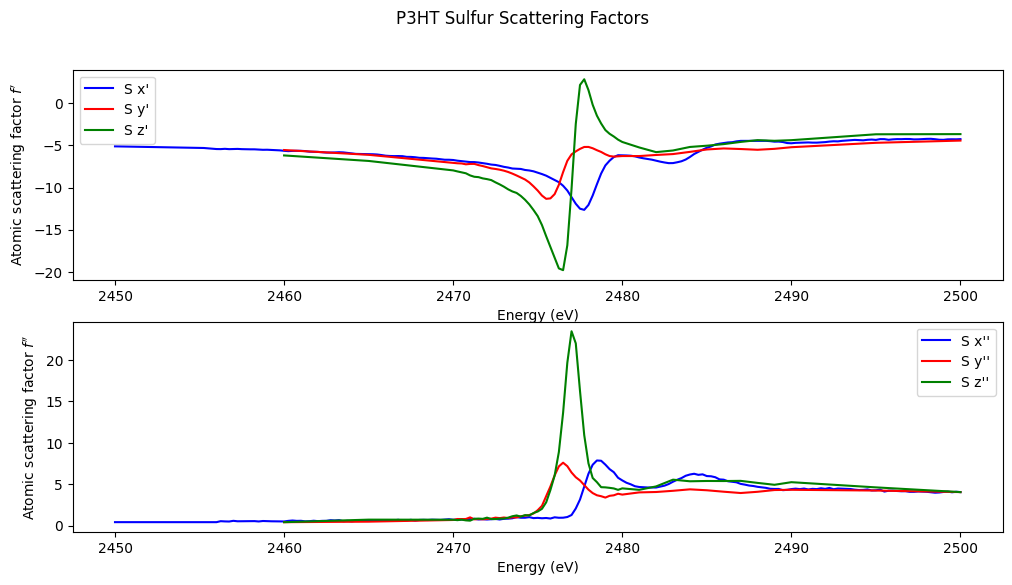

In [9]:
# Data density for x direction is more dense than the y or z directions. Lets plot each ' and '' for each axis.
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
fig.suptitle("P3HT Sulfur Scattering Factors")  
axes[0].plot(
    P3HT_Sulfur_Factors["Energy (eV)"],
    P3HT_Sulfur_Factors["fx'"],
    label="S x'",
    color="blue",
)
axes[1].plot(
    P3HT_Sulfur_Factors["Energy (eV)"],
    P3HT_Sulfur_Factors["fx''"],
    label="S x''",
    color="blue",
)
axes[0].plot(
    P3HT_Sulfur_Factors["Energy (eV).1"],
    P3HT_Sulfur_Factors["fy'"],
    label="S y'",
    color="red",
)
axes[1].plot(
    P3HT_Sulfur_Factors["Energy (eV).2"],
    P3HT_Sulfur_Factors["fy''"],
    label="S y''",
    color="red",
)
axes[0].plot(
    P3HT_Sulfur_Factors["Energy (eV).2"],
    P3HT_Sulfur_Factors["fz'"],
    label="S z'",
    color="green",
)
axes[1].plot(
    P3HT_Sulfur_Factors["Energy (eV).2"],
    P3HT_Sulfur_Factors["fz''"],
    label="S z''",
    color="green",
)
axes[0].set_xlabel("Energy (eV)")
axes[1].set_xlabel("Energy (eV)")
axes[0].set_ylabel("Atomic scattering factor $f'$")
axes[1].set_ylabel("Atomic scattering factor $f''$")
axes[0].legend()
axes[1].legend()
plt.show()


### Load the unit cell

In [10]:
# Load the unit cell data
H_pos = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\H_pos.txt"))
C_pos = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\C_pos.txt"))
S_pos = np.loadtxt(os.path.join(cwd, r"StructureFactors\Examples\P3HT\Data\S_pos.txt"))

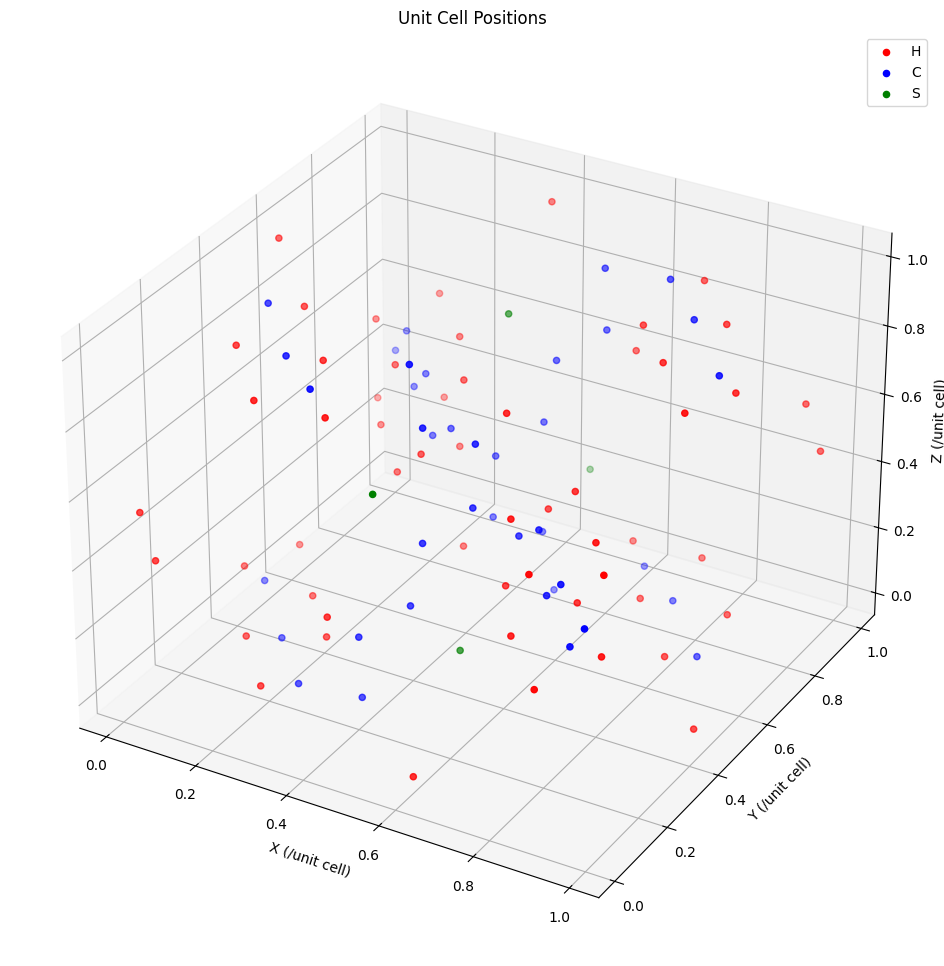

In [11]:
# Display the unit cell positions (which is a list of atomic positions) in a 3D plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(H_pos[:, 0], H_pos[:, 1], H_pos[:, 2], c="red", label="H")
ax.scatter(C_pos[:, 0], C_pos[:, 1], C_pos[:, 2], c="blue", label="C")
ax.scatter(S_pos[:, 0], S_pos[:, 1], S_pos[:, 2], c="green", label="S")
ax.set_xlabel("X (/unit cell)")
ax.set_ylabel("Y (/unit cell)")
ax.set_zlabel("Z (/unit cell)")
ax.set_title("Unit Cell Positions")
ax.legend()

# # For each atom calculate the nearest neighbour and draw a line
# atoms = np.r_[H_pos, C_pos, S_pos]
# for i, atom in enumerate(atoms):
#     # Calculate the distance to each atom
#     distances = np.linalg.norm(atoms - atom, axis=1)
#     # Find the nearest neighbour (excluding itself)
#     nearest_neighbour_index = np.argmin(distances[distances > 0])
#     # Draw a line between the two atoms
#     ax.plot([atom[0], atoms[nearest_neighbour_index][0]],
#             [atom[1], atoms[nearest_neighbour_index][1]],
#             [atom[2], atoms[nearest_neighbour_index][2]], c="red", alpha=0.5)    

### Use the StructureFactors library to calculate the structure factors, for the default Sulfur values, for the default CIF orientation

In [12]:
from StructureFactors import Structure

In [13]:
P3HT = Structure(
    energies=energies,
    scattering_factors={
        1: (H_f1, H_f2),
        6: (C_f1, C_f2),
        16: (S_f1, S_f2),
        },
    atomic_basis={
        1: H_pos,
        6: C_pos,
        16: S_pos,
    }
)

Text(0.5, 0.98, 'Structure Factor Intensity for P3HT')

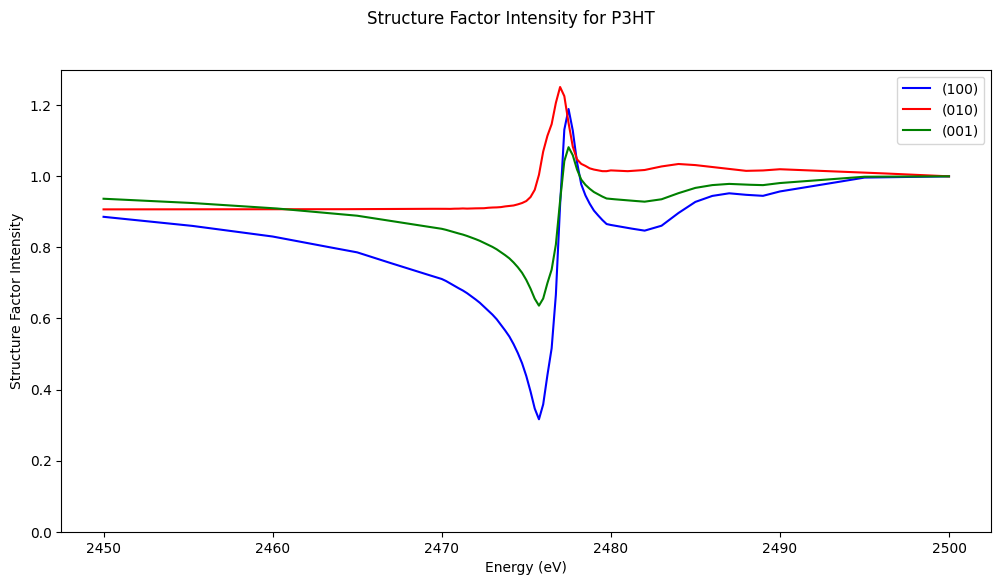

In [14]:
d100 = P3HT.calculate_structure_factor_intensity(1,0,0)
d010 = P3HT.calculate_structure_factor_intensity(0,1,0)
d001 = P3HT.calculate_structure_factor_intensity(0,0,1)

# Plot the structure factors, normalized to the maximum value
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(energies, d100 / d100[-1], label="(100)", color="blue")
ax.plot(energies, d010 / d010[-1], label="(010)", color="red")
ax.plot(energies, d001 / d001[-1], label="(001)", color="green")
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Structure Factor Intensity")
ax.set_ylim(0, 1.3)
ax.legend()
fig.suptitle("Structure Factor Intensity for P3HT")


# Properly tread the molecular orientation and polarized Sulfur edge along x,y,z 

### Redefine the atomic positions according to a molecular frame of reference

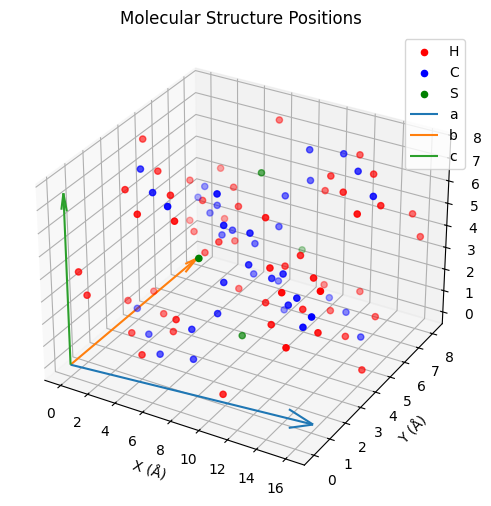

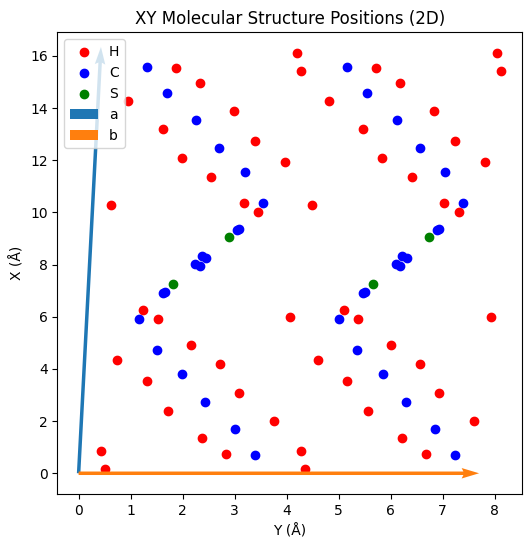

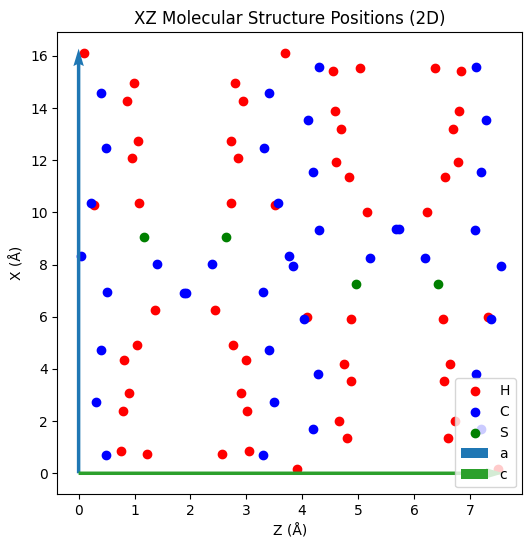

In [48]:
# Define the unit cell parameters
# Kayunkid
a,b,c = (16, 7.8, 7.8)
gamma = np.deg2rad(86.5)
# Dudenko
a,b,c = (16.3, 7.7, 7.6)
gamma = np.deg2rad(87.0)

# P2_1/c == Monoclinic 
# Calculate the unit cell vectors in cartesian coordinates
alpha = np.deg2rad(90)
beta = np.deg2rad(90)
# gamma defined.

unit_vectors = np.array([
    [1, 0, 0],  # a
    [0, 1, 0],  # b
    [0, 0, 1],  # c
], dtype=float)

# From https://en.wikipedia.org/wiki/Fractional_coordinates#Three_Dimensions
frac_to_cart = np.array([
    [a * np.sin(beta) * np.sqrt(1 - (1/np.tan(alpha)*1/np.tan(beta) - (1/np.sin(alpha) * 1/np.sin(beta) * np.cos(gamma))) ** 2), 0, 0,],
    [a * 1/np.sin(alpha) * np.cos(gamma) - a * 1/np.tan(alpha) * np.cos(beta), b * np.sin(alpha), 0],
    [a * np.cos(beta), b * np.cos(alpha), c],
]) # 3 x 3
# As we have a specified angle for gamma (between a & b), we can keep the above as is.

# Convert all coordinates to cartesian coordinates
# H_pos: N x 3
H_pos_car = np.zeros(H_pos.shape)
C_pos_car = np.zeros(C_pos.shape)
S_pos_car = np.zeros(S_pos.shape)
unit_vectors_car = np.zeros(unit_vectors.shape)

for i in range(H_pos.shape[0]):
    H_pos_car[i] = np.dot(frac_to_cart, H_pos[i])
for i in range(C_pos.shape[0]):
    C_pos_car[i] = np.dot(frac_to_cart, C_pos[i])
for i in range(S_pos.shape[0]):
    S_pos_car[i] = np.dot(frac_to_cart, S_pos[i])
for i in range(unit_vectors.shape[0]):
    unit_vectors_car[i] = np.dot(frac_to_cart, unit_vectors[i])


# Display the molecular structure in a 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(H_pos_car[:, 0], H_pos_car[:, 1], H_pos_car[:, 2], c="red", label="H")
ax.scatter(C_pos_car[:, 0], C_pos_car[:, 1], C_pos_car[:, 2], c="blue", label="C")
ax.scatter(S_pos_car[:, 0], S_pos_car[:, 1], S_pos_car[:, 2], c="green", label="S")
# Plot the unit vectors
clrs = plt.get_cmap("tab10")
ax.quiver(0,0,0, *unit_vectors_car[0], color=clrs(0), label="a", arrow_length_ratio=0.1)
ax.quiver(0,0,0, *unit_vectors_car[1], color=clrs(1), label="b", arrow_length_ratio=0.1)
ax.quiver(0,0,0, *unit_vectors_car[2], color=clrs(2), label="c", arrow_length_ratio=0.1)
ax.set_xlabel("X (Å)")
ax.set_ylabel("Y (Å)")
ax.set_zlabel("Z (Å)")
ax.set_title("Molecular Structure Positions")
ax.legend()

# Plot the molecular structure in 2D
fig2, ax2 = plt.subplots(figsize=(6, 6))
ax2.scatter(H_pos_car[:, 1], H_pos_car[:, 0], c="red", label="H")
ax2.scatter(C_pos_car[:, 1], C_pos_car[:, 0], c="blue", label="C")
ax2.scatter(S_pos_car[:, 1], S_pos_car[:, 0], c="green", label="S")
ax2.quiver(*0.0*np.sum(unit_vectors_car, axis=0)[[1,0]], *unit_vectors_car[0][[1,0]], color=clrs(0), label="a", scale_units='xy', scale=1)
ax2.quiver(*0.0*np.sum(unit_vectors_car, axis=0)[[1,0]], *unit_vectors_car[1][[1,0]], color=clrs(1), label="b", scale_units='xy', scale=1)
ax2.set_xlabel("Y (Å)")
ax2.set_ylabel("X (Å)")
ax2.set_title("XY Molecular Structure Positions (2D)")
ax2.legend()
# Calculate the structure factor intensity for the molecular structure
fig3, ax3 = plt.subplots(figsize=(6, 6))
ax3.scatter(H_pos_car[:, 2], H_pos_car[:, 0], c="red", label="H")
ax3.scatter(C_pos_car[:, 2], C_pos_car[:, 0], c="blue", label="C")
ax3.scatter(S_pos_car[:, 2], S_pos_car[:, 0], c="green", label="S")
ax3.quiver(*0*np.sum(unit_vectors_car, axis=0)[[2,0]], *unit_vectors_car[0][[2,0]], color=clrs(0), label="a", scale_units='xy', scale=1)
ax3.quiver(*0*np.sum(unit_vectors_car, axis=0)[[2,0]], *unit_vectors_car[2][[2,0]], color=clrs(2), label="c", scale_units='xy', scale=1)
ax3.set_xlabel("Z (Å)")
ax3.set_ylabel("X (Å)")
ax3.set_title("XZ Molecular Structure Positions (2D)")
ax3.legend()


angle: 30.729457665036318


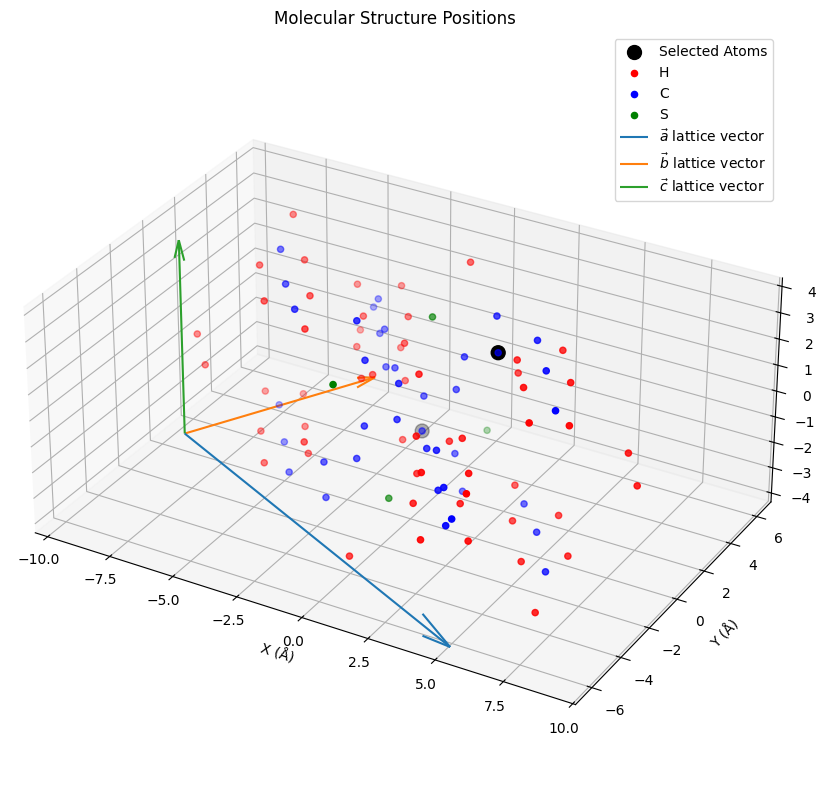

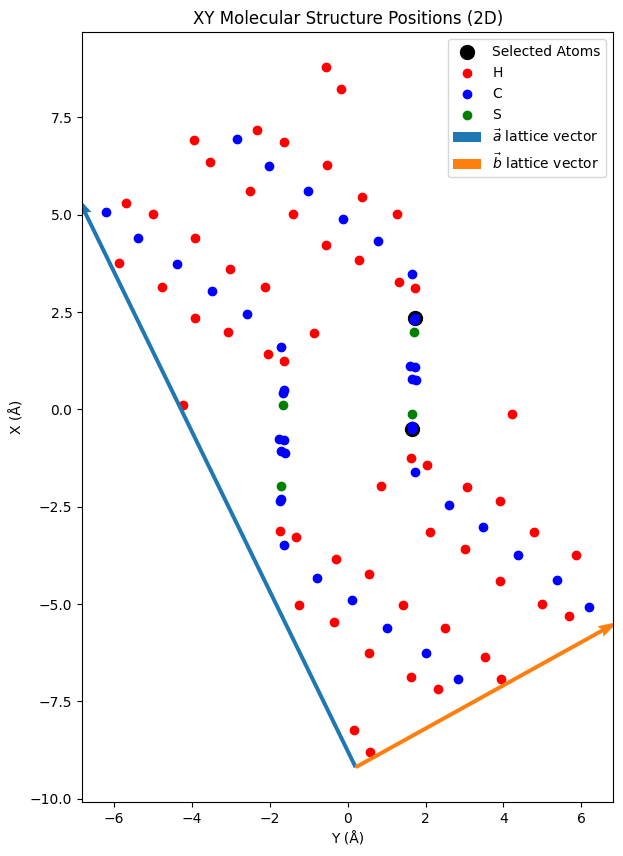

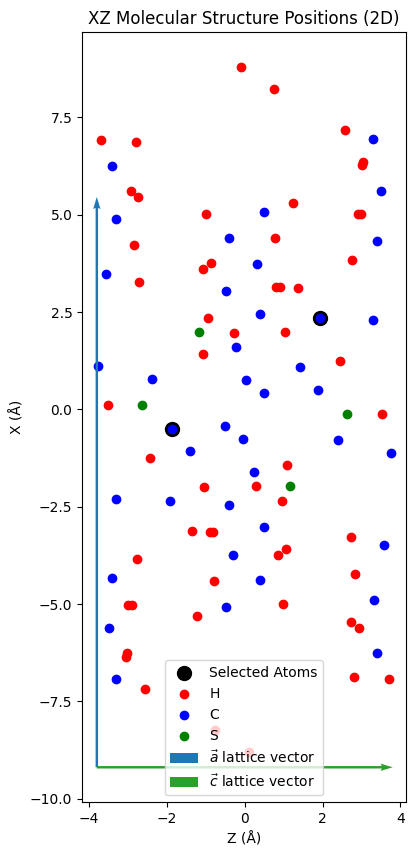

In [74]:
# Create copies of the positions for the molecular structure
H_pos_molecular = H_pos.copy()
C_pos_molecular = C_pos.copy()
S_pos_molecular = S_pos.copy()

# Re-centre the positions around the origin
H_pos_molecular -= 0.5
C_pos_molecular -= 0.5
S_pos_molecular -= 0.5

unit_vectors = np.array([
    [1, 0, 0],  # a
    [0, 1, 0],  # b
    [0, 0, 1],  # c
], dtype=float)
    
select_atoms = np.array([C_pos_molecular[12], C_pos_molecular[13]]).copy()
    
# Convert all coordinates to cartesian coordinates
# H_pos: N x 3
H_pos_mol_car = np.zeros(H_pos_molecular.shape, dtype=float)
C_pos_mol_car = np.zeros(C_pos_molecular.shape, dtype=float)
S_pos_mol_car = np.zeros(S_pos_molecular.shape, dtype=float)
select_atoms_car = np.zeros(select_atoms.shape, dtype=float)
unit_vectors_car = np.zeros(unit_vectors.shape, dtype=float)

for i in range(H_pos_molecular.shape[0]):
    H_pos_mol_car[i] = np.dot(frac_to_cart, H_pos_molecular[i])
for i in range(C_pos_molecular.shape[0]):
    C_pos_mol_car[i] = np.dot(frac_to_cart, C_pos_molecular[i])
for i in range(S_pos_molecular.shape[0]):
    S_pos_mol_car[i] = np.dot(frac_to_cart, S_pos_molecular[i])
for i in range(select_atoms.shape[0]):
    select_atoms_car[i] = np.dot(frac_to_cart, select_atoms[i])
for i in range(unit_vectors.shape[0]):
    unit_vectors_car[i] = np.dot(frac_to_cart, unit_vectors[i])
    
    
## Rotate the positions to align the backbone along the z-axis, and sidechains along the x/y-axis
# use the position of two atoms to do this..
select_atoms_car = np.zeros(select_atoms.shape)
for i in range(select_atoms.shape[0]):
    select_atoms_car[i] = np.dot(frac_to_cart, select_atoms[i])
# Calculate the vector between the two atoms, away from the b-axis.
vector = select_atoms_car[1] - select_atoms_car[0]
angle = np.rad2deg(np.arctan2(vector[1], vector[0]))
print("angle:", angle)
# manually define the angle according to the paper
a_offset = np.rad2deg(np.arctan2(unit_vectors_car[0][1], unit_vectors_car[0][0]))
angle = - 26 - a_offset # Add the angular cartesian offset of the 'a' unit vector from the x-axis

# Create the rotation matrix
from scipy.spatial.transform import Rotation as R
rotation = R.from_euler("z", np.deg2rad(angle), degrees=False).as_matrix()
# Rotate the positions of the atoms
for i in range(H_pos_mol_car.shape[0]):
    H_pos_mol_car[i] = np.dot(rotation, H_pos_mol_car[i])
for i in range(C_pos_mol_car.shape[0]):
    C_pos_mol_car[i] = np.dot(rotation, C_pos_mol_car[i])
for i in range(S_pos_mol_car.shape[0]):
    S_pos_mol_car[i] = np.dot(rotation, S_pos_mol_car[i])
for i in range(select_atoms_car.shape[0]):
    select_atoms_car[i] = np.dot(rotation, select_atoms_car[i])
for i in range(unit_vectors_car.shape[0]):
    unit_vectors_car[i] = np.dot(rotation, unit_vectors_car[i])
    
# Display the molecular structure in a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d",
                    #  elev=20, azim=30
                    #  elev=90, azim=0
                     )
ax.scatter(select_atoms_car[:, 0], select_atoms_car[:, 1], select_atoms_car[:, 2], c="black", label="Selected Atoms", s=100)
ax.scatter(H_pos_mol_car[:, 0], H_pos_mol_car[:, 1], H_pos_mol_car[:, 2], c="red", label="H")
ax.scatter(C_pos_mol_car[:, 0], C_pos_mol_car[:, 1], C_pos_mol_car[:, 2], c="blue", label="C")
ax.scatter(S_pos_mol_car[:, 0], S_pos_mol_car[:, 1], S_pos_mol_car[:, 2], c="green", label="S")
# Plot the unit vectors
clrs = plt.get_cmap("tab10")
ax.quiver(*-0.5*np.sum(unit_vectors_car, axis=0), *unit_vectors_car[0], color=clrs(0), label=r"$\vec{a}$ lattice vector", arrow_length_ratio=0.1)
ax.quiver(*-0.5*np.sum(unit_vectors_car, axis=0), *unit_vectors_car[1], color=clrs(1), label=r"$\vec{b}$ lattice vector", arrow_length_ratio=0.1)
ax.quiver(*-0.5*np.sum(unit_vectors_car, axis=0), *unit_vectors_car[2], color=clrs(2), label=r"$\vec{c}$ lattice vector", arrow_length_ratio=0.1)
# ax.quiver(*-0.5*unit_vectors_car[1], *unit_vectors_car[1], color=clrs(1), label="b", arrow_length_ratio=0.1)
# ax.quiver(*-0.5*unit_vectors_car[2], *unit_vectors_car[2], color=clrs(2), label="c", arrow_length_ratio=0.1)
# ax.quiver(*-0.5*np.dot(frac_to_cart, [1, 1, 1]), *np.dot(frac_to_cart, [0.5, 0, 0]), color=clrs(0), label="a", arrow_length_ratio=0.1)
# ax.quiver(*-0.5*np.dot(frac_to_cart, [1, 1, 1]), *np.dot(frac_to_cart, [0, 0.5, 0]), color=clrs(1), label="b", arrow_length_ratio=0.1)
# ax.quiver(*-0.5*np.dot(frac_to_cart, [1, 1, 1]), *np.dot(frac_to_cart, [0, 0, 0.5]), color=clrs(2), label="c", arrow_length_ratio=0.1)
ax.set_xlabel("X (Å)")
ax.set_ylabel("Y (Å)")
ax.set_zlabel("Z (Å)")
ax.set_title("Molecular Structure Positions")
ax.legend()
ax.set_aspect('equal', adjustable='box')
# fig.tight_layout()
# Plot the molecular structure in 2D
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(select_atoms_car[:, 1], select_atoms_car[:, 0], c="black", label="Selected Atoms", s=100)
ax.scatter(H_pos_mol_car[:, 1], H_pos_mol_car[:, 0], c="red", label="H")
ax.scatter(C_pos_mol_car[:, 1], C_pos_mol_car[:, 0], c="blue", label="C")
ax.scatter(S_pos_mol_car[:, 1], S_pos_mol_car[:, 0], c="green", label="S")
ax.quiver(*-0.5*np.sum(unit_vectors_car, axis=0)[[1,0]], *unit_vectors_car[0][[1,0]], color=clrs(0), label=r"$\vec{a}$ lattice vector", scale_units='xy', scale=1)
ax.quiver(*-0.5*np.sum(unit_vectors_car, axis=0)[[1,0]], *unit_vectors_car[1][[1,0]], color=clrs(1), label=r"$\vec{b}$ lattice vector", scale_units='xy', scale=1)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("Y (Å)")
ax.set_ylabel("X (Å)")
ax.set_title("XY Molecular Structure Positions (2D)")
ax.legend()
# Calculate the structure factor intensity for the molecular structure
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(select_atoms_car[:, 2], select_atoms_car[:, 0], c="black", label="Selected Atoms", s=100)
ax.scatter(H_pos_mol_car[:, 2], H_pos_mol_car[:, 0], c="red", label="H")
ax.scatter(C_pos_mol_car[:, 2], C_pos_mol_car[:, 0], c="blue", label="C")
ax.scatter(S_pos_mol_car[:, 2], S_pos_mol_car[:, 0], c="green", label="S")
ax.quiver(*-0.5*np.sum(unit_vectors_car, axis=0)[[2,0]], *unit_vectors_car[0][[2,0]], color=clrs(0), label=r"$\vec{a}$ lattice vector", scale_units='xy', scale=1)
ax.quiver(*-0.5*np.sum(unit_vectors_car, axis=0)[[2,0]], *unit_vectors_car[2][[2,0]], color=clrs(2), label=r"$\vec{c}$ lattice vector", scale_units='xy', scale=1)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("Z (Å)")
ax.set_ylabel("X (Å)")
ax.set_title("XZ Molecular Structure Positions (2D)")
ax.legend()


### Use the StructureFactors library to calculate the structure factors, given distinct, polarized X,Y,Z

In [64]:
# Prepare the x,y,z data to match the energy range - linearly interpolate between values.
S_en_x = P3HT_Sulfur_Factors["Energy (eV)"].to_numpy()
S_en_y = P3HT_Sulfur_Factors["Energy (eV).1"].to_numpy()
S_en_z = P3HT_Sulfur_Factors["Energy (eV).2"].to_numpy()
S_f1_x = P3HT_Sulfur_Factors["fx'"].to_numpy()
S_f2_x = P3HT_Sulfur_Factors["fx''"].to_numpy()
S_f1_y = P3HT_Sulfur_Factors["fy'"].to_numpy()
S_f2_y = P3HT_Sulfur_Factors["fy''"].to_numpy()
S_f1_z = P3HT_Sulfur_Factors["fz'"].to_numpy()
S_f2_z = P3HT_Sulfur_Factors["fz'"].to_numpy()

# Remove NaN values
S_en_x = S_en_x[~np.isnan(S_en_x)]
S_en_y = S_en_y[~np.isnan(S_en_y)]
S_en_z = S_en_z[~np.isnan(S_en_z)]
S_f1_x = S_f1_x[~np.isnan(S_f1_x)]
S_f2_x = S_f2_x[~np.isnan(S_f2_x)]
S_f1_y = S_f1_y[~np.isnan(S_f1_y)]
S_f2_y = S_f2_y[~np.isnan(S_f2_y)]
S_f1_z = S_f1_z[~np.isnan(S_f1_z)]
S_f2_z = S_f2_z[~np.isnan(S_f2_z)]

# Check data lengths
assert len(S_en_x) == len(S_f1_x) == len(S_f2_x), "Length of energy and f1, f2 data do not match"
assert len(S_en_y) == len(S_f1_y) == len(S_f2_y), "Length of energy and f1, f2 data do not match"
assert len(S_en_z) == len(S_f1_z) == len(S_f2_z), "Length of energy and f1, f2 data do not match"

# Check x matches C & H data length
assert len(S_en_x) == len(C_f1), "Length of energy x and C data do not match"

# Check y & z doen't match C & H data length
assert len(S_en_y) != len(C_f1), "Length of energy y and C data do match"
assert len(S_en_z) != len(C_f1), "Length of energy z and C data do match"

# Check y & z match each other
assert all(S_en_y == S_en_z), "Length of y & z data do not match"
# Interpolate the y & z data to match the x data
S_f1_y = np.interp(S_en_x, S_en_y, S_f1_y)
S_f2_y = np.interp(S_en_x, S_en_y, S_f2_y)
S_f1_z = np.interp(S_en_x, S_en_z, S_f1_z)
S_f2_z = np.interp(S_en_x, S_en_z, S_f2_z)
# Check data lengths
assert len(S_en_x) == len(S_f1_x) == len(S_f2_x), "Length of energy and f1, f2 data do match"
assert len(S_en_x) == len(S_f1_y) == len(S_f2_y), "Length of energy and f1, f2 data do match"


In [65]:
P3HT_x = Structure(
    energies=energies,
    scattering_factors={
        1: (H_f1, H_f2),
        6: (C_f1, C_f2),
        16: (S_f1_x, S_f2_x),
        },
    atomic_basis={
        1: H_pos_mol_car,
        6: C_pos_mol_car,
        16: S_pos_mol_car,
    }
)

P3HT_y = Structure(
    energies=energies,
    scattering_factors={
        1: (H_f1, H_f2),
        6: (C_f1, C_f2),
        16: (S_f1_y, S_f2_y),
        },
    atomic_basis={
        1: H_pos_mol_car,
        6: C_pos_mol_car,
        16: S_pos_mol_car,
    }
)

P3HT_z = Structure(
    energies=energies,
    scattering_factors={
        1: (H_f1, H_f2),
        6: (C_f1, C_f2),
        16: (S_f1_z, S_f2_z),
        },
    atomic_basis={
        1: H_pos_mol_car,
        6: C_pos_mol_car,
        16: S_pos_mol_car,
    }
)

Text(0.5, 0.98, 'Structure Factor Intensity for P3HT (x, y, z)')

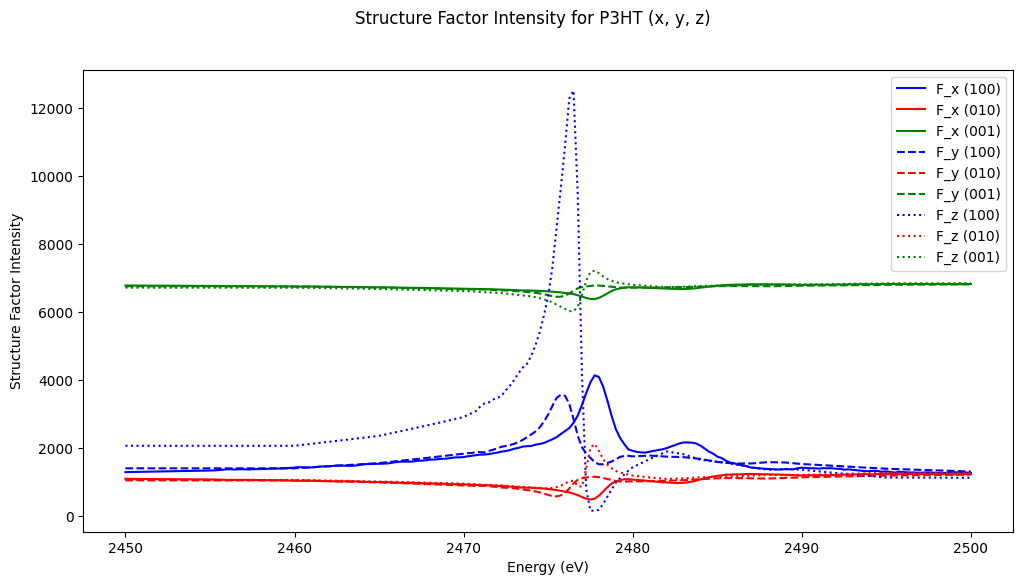

In [70]:
# Plot the contributions to diffraction of each structure factor
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(energies, P3HT_x.calculate_structure_factor_intensity(1,0,0), label="F_x (100)", color="blue")
ax.plot(energies, P3HT_x.calculate_structure_factor_intensity(0,1,0), label="F_x (010)", color="red")
ax.plot(energies, P3HT_x.calculate_structure_factor_intensity(0,0,1), label="F_x (001)", color="green")
ax.plot(energies, P3HT_y.calculate_structure_factor_intensity(1,0,0), label="F_y (100)", color="blue", linestyle="--")
ax.plot(energies, P3HT_y.calculate_structure_factor_intensity(0,1,0), label="F_y (010)", color="red", linestyle="--")
ax.plot(energies, P3HT_y.calculate_structure_factor_intensity(0,0,1), label="F_y (001)", color="green", linestyle="--")
ax.plot(energies, P3HT_z.calculate_structure_factor_intensity(1,0,0), label="F_z (100)", color="blue", linestyle=":")
ax.plot(energies, P3HT_z.calculate_structure_factor_intensity(0,1,0), label="F_z (010)", color="red", linestyle=":")
ax.plot(energies, P3HT_z.calculate_structure_factor_intensity(0,0,1), label="F_z (001)", color="green", linestyle=":")
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Structure Factor Intensity")
ax.legend()
fig.suptitle("Structure Factor Intensity for P3HT (x, y, z)")

### Calculate the angular dependence of the grazing incidence for the angles measured at SMI

P3HT Films are edge on.

##### Electric field in plane 

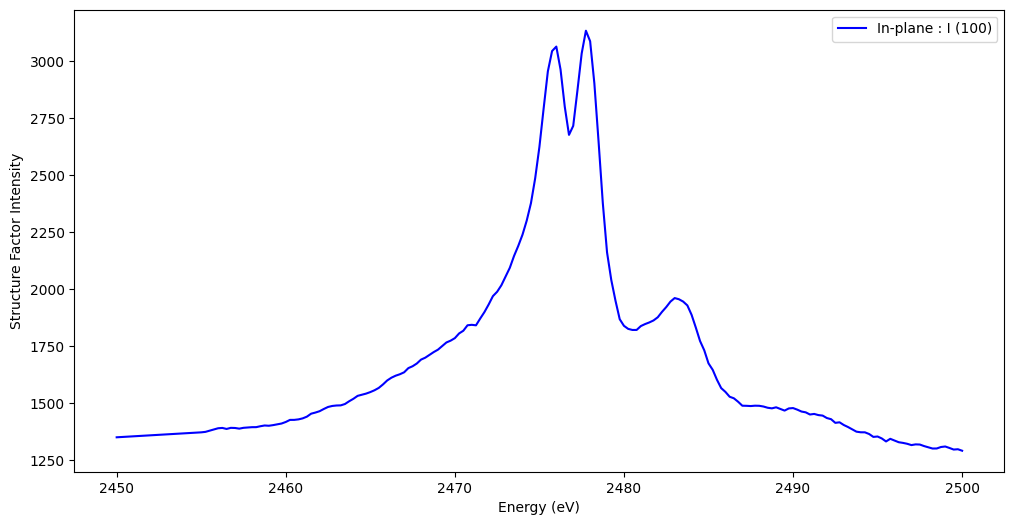

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))

# Electric field parallel to a mix of x & y directions, with a mixing of z direction based on angle of incidence.
hkl = (1, 0, 0)
# for angle in [0.4, 0.8, 4, 8]:
    # Calculate the combination
Ix = P3HT_x.calculate_structure_factor_intensity(*hkl)
Iy = P3HT_y.calculate_structure_factor_intensity(*hkl)
I = np.sqrt(Ix**2 + Iy**2) * 1/np.sqrt(2)

ax.plot(energies, I, label="In-plane : I (100)", color="blue")  
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Structure Factor Intensity")
ax.legend()

#### Electric field out of plane